#**Twitter network analysis**

Network made up of **Pablo's followers and some of their followers**:

*   *Number of followers* someone has is just one possible way of finding influence on Twitter (this example)
*   Another way could be to look for users often connected with other people in *actual tweets* (deal with rate limits, requires more computational resources)





## 1.   **Installing necessary Python Packages**



In [ ]:
!pip install tweepy # library for accessing the Twitter API
!pip install pandas # data analysis and manipulation tool
!pip install networkx # creation, manipulation, and study of the structure, dynamics, and functions of complex networks
!pip install pathlib # representing filesystem paths with semantics appropriate for different operating systems



## 2.   **Import Python Packages**



In [ ]:
import json
import tweepy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.link_analysis import pagerank_alg
from pathlib import Path
import time



## 3.   **Load or create network CSV file into a dataframe**



Download network CSV file here: https://drive.google.com/file/d/1ZMkvo3FoYPceMY47Ny0LJVcORPhoornk/view?usp=sharing

Upload it to your gdrive (change file and dataframe paths if necessary)

In [ ]:
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

data = Path('/gdrive/My Drive/twitter_network.csv')
if data.is_file():
    # File exists
    df = pd.read_csv('/gdrive/My Drive/twitter_network.csv')
else:
    # Load Twitter API credentials from json file
    with open("cred.json", "r") as file:
        creds = json.load(file)
    
    client = tweepy.Client(bearer_token=creds['BEARER_TOKEN'], consumer_key=creds['CONSUMER_KEY'],
                       consumer_secret=creds['CONSUMER_SECRET'],
                       access_token=creds['ACCESS_TOKEN'], access_token_secret=creds['ACCESS_SECRET'],
                       wait_on_rate_limit=True)    
    
    # The id of the targeted user (Pablo)
    twitter_id = 77760951
    
    # Get Pablo's followers (100)
    pablos_followers = client.get_users_followers(id=twitter_id)
    followers = []
    
    for source in pablos_followers.data:
        followers.append(['lablox',source.username])
        backoff_counter = 1
        while True:
            try:
                followers_of_followers = client.get_users_followers(id=source.id, max_results = 1000)
                if followers_of_followers.data is not None:
                    # For each Pablo's follower, take 1000 followers (or less)
                    for target in followers_of_followers.data:
                        followers.append([source.username,target.username])
                break;
            except Exception as e:
                print(e)
                time.sleep(60*backoff_counter)
                backoff_counter += 1
                continue
            
    df = pd.DataFrame(followers, columns=['source', 'target'])
    df.to_csv ('twitter_network.csv', index = False, header=True)

Mounted at /gdrive




## 4.   **Visualize first 20 rows of dataframe**



In [ ]:
df.head(20)

,source,target
0,lablox,FSantiagoZ
1,FSantiagoZ,Seba_RT
2,FSantiagoZ,greciadiaz_diaz
3,FSantiagoZ,nandez6369
4,FSantiagoZ,Merli98800111
5,FSantiagoZ,Facho_Derrotado
6,FSantiagoZ,Alejand61406508
7,FSantiagoZ,mocantin
8,FSantiagoZ,joselabbem
9,FSantiagoZ,Geraldi63890854




## 5.   **Build network from dataframe**



In [ ]:
# Directed network: FSantiagoZ follows lablox != lablox follows FSantiagoZ
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.DiGraph())
print(nx.info(G)) # DiGraph with 41118 nodes and 45866 edges

DiGraph with 41118 nodes and 45866 edges




## 6.   **Visualize network**





* Network visualized with **Gephi** (the visualization was a mess with *NetworkX* due to the size of the network)
* *ForceAtlas2* algorithm to get a good display
* Node and label size by *In-Degree* (number of incoming links)











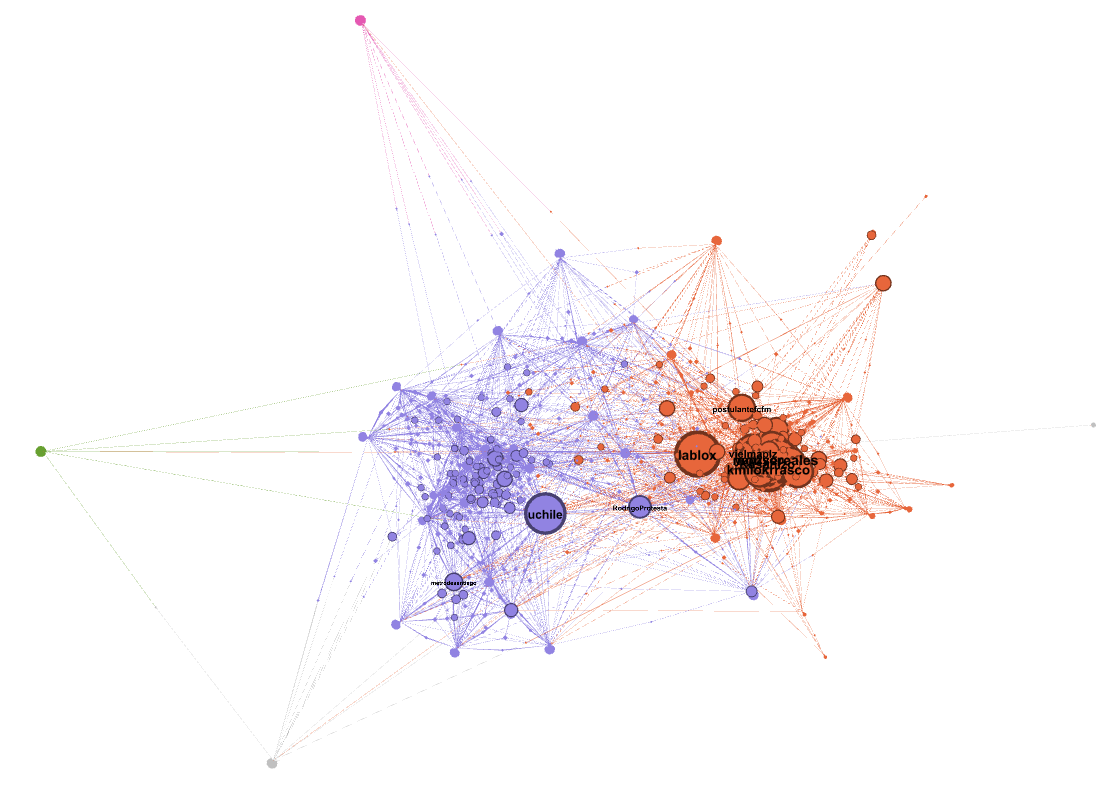

Two well-differentiated groups can be observed:

1. Students, professors or people related to University of Chile (**@uchile**) that have almost nothing to do with Pablo (**@lablox**) -> colored in purple
2. Pablo's followers or users that Pablo has followed that are more related to each other -> colored in orange





## 7.   **Compute centrality measures**






In [ ]:
# Sorts the returned dictionary (key:node label, value: desired metric) and return top 15 users
def sort_dict_print_metrics(dictionary):
    sorted_dict = sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
    for item in sorted_dict[:15]:
        print("{:<20}{}".format(item[0],round(item[1],5)))



### 7.1   **Degree centrality**



Useful to find very connected individuals, popular individuals, individuals
who are likely to hold most information

In [ ]:
degree_centrality = nx.degree_centrality(G) # Dictionary of nodes with degree centrality as the value.
# Sort dict and print top 15 nodes with highest degree centrality
sort_dict_print_metrics(degree_centrality)

uchile              0.02478
postulantefcfm      0.02464
RodrigoProtesta     0.02459
metrodesantiago     0.02454
ruta_tweet          0.02452
entel_ayuda         0.02449
ivanaabanana        0.02449
infoefemerides      0.02447
felipekast          0.02442
lcruzcoke           0.02439
AyudaBancoChile     0.02439
CodeXverde          0.02439
subtel_chile        0.02439
lauralbornoz        0.02439
Medicina_Uchile     0.02439




### 7.2   **Betweenness centrality**



Measures linking power of an individual

 An individual that is often a bridge can control the spread of information, allowing or limiting its flow (spread control)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G) # Dictionary of nodes with betweenness centrality as the value.
# Sort dict and print top 15 nodes with highest betweenness centrality
sort_dict_print_metrics(betweenness_centrality)

lablox              0.00061
vielmaplz           0.0001
Kasanizo            9e-05
Karen_RojasB        8e-05
CeruleanFeather     6e-05
jfloresaristi       6e-05
felipeimd           5e-05
SergioEhijoP        5e-05
comfeli_fcfm        4e-05
IntAtenas           4e-05
CNTSAmigosMetro     3e-05
RodrigoProtesta     3e-05
ivanaabanana        3e-05
Simbioticoblog      3e-05
Medicina_Uchile     2e-05




### 7.3   **Closeness centrality**



Measures ease of an individual to reach other individuals

Individuals who are best placed to influence the entire network most quickly (spread speed)

In [ ]:
closeness_centrality = nx.closeness_centrality(G) # Dictionary of nodes with closeness centrality as the value.
# Sort dict and print top 15 nodes with highest closeness centrality
sort_dict_print_metrics(closeness_centrality)

uchile              0.00066
kmilokrrasco        0.00066
monsereales         0.00064
yop2yop             0.00062
vielmaplz           0.00058
lablox              0.00057
Kasanizo            0.00057
Karen_RojasB        0.00057
comfeli_fcfm        0.00055
Simbioticoblog      0.00055
IntAtenas           0.00055
ruta_tweet          0.00054
RodrigoProtesta     0.00054
UmarCrazy           0.00054
metanoia2022        0.00053




### 7.4   **Eigenvector centrality**



Measures how important is an individual based on how important are the individuals connected with him

Connecting to some individuals has more benefit than connecting to others

It is not about the quantity, but the quality of the connections

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G) # Dictionary of nodes with eigenvector centrality as the value.
# Sort dict and print top 15 nodes with highest eigenvector centrality
sort_dict_print_metrics(eigenvector_centrality)

monsereales         0.12266
kmilokrrasco        0.12079
Kasanizo            0.11866
yop2yop             0.11813
Karen_RojasB        0.10635
IntAtenas           0.10215
comfeli_fcfm        0.10116
uchile              0.10114
vielmaplz           0.10005
CeruleanFeather     0.09882
Simbioticoblog      0.09395
lablox              0.09328
UmarCrazy           0.0926
laradiointegral     0.0873
ryrcompany          0.08601




### 7.5   **PageRank**



Measures the probability that a random individual clicking on a random link will be directed to another node of the network

In [ ]:
pagerank = pagerank_alg.pagerank(G) # Dictionary of nodes with PageRank as value
# Sort dict and print top 15 nodes with highest pagerank
sort_dict_print_metrics(pagerank)

KilaserCentro       4e-05
mandrilles          3e-05
cuchocurucho        3e-05
profepuga           3e-05
malumcg             3e-05
Kasanizo            3e-05
yop2yop             3e-05
kmilokrrasco        3e-05
lablox              3e-05
monsereales         3e-05
vielmaplz           3e-05
comfeli_fcfm        3e-05
Emol                3e-05
CeruleanFeather     3e-05
Ing2030UChile       3e-05


## 8.   **Results**



*   University of Chile (**@uchile**) has the highest *degree centrality*, which means that it is a popular entity in this network.
*   Pablo (**@lablox**) is the entity with the highest linking power (highest *betweenness centrality*) of this network, which means that he can control the spread of information within the network.
*  University of Chile (**@uchile**) and Camilo Carrasco (**@kmilokrrasco**) are the entities with the highest *closeness centrality*, which means that they are able to influence the entire network faster due to their location within the network.
*   **@monsereales** is the entity with the highest *eigenvector centrality*, which means that it is not the most popular entity but it is connected to important entities within the network (quality connections).
*   Kilaser (**@KilaserCentro**) is the entity with the highest *PageRank*, which means that it is the entity with the highest probability of being accessed randomly by any other node in the network.







## 9.   **Conclusion**



From the obtained results, it can be observed that:

1.   Pablo has a good control of the information that circulates through the network (it makes sense since this network is based on him and his followers).
2.   Chile University is a popular entity with the facility to spread information quickly. 
3.   However, it seems to be connected to a number of unimportant entities (maybe students who only use Twitter occasionally) since *eigenvector centrality* is not that high (poor quality connections).









## 10.   **Personal opinion**



*Influencer* is a term that can be described or understood in various ways

### What are influencers in the context of social network analysis?

  -   Individuals with many followers?
  -   Individuals who control the flow of information?
  -   Individuals who spread information quickly?
  -   Individuals with good quality connections?
  -   A mix of all of the above?

### How to determine whether an individual is influencer or not?

From my point of view an influencer is a **mix** of all the previous options. 

Therefore, we must consider all the **centrality measures** shown above when determining whether an individual is an influencer or not.

Perhaps it would be good to define a **global influence measure** that considers all these centrality measures and also other aspects of a network that may be important to detect influential individuals.